# Avaliação Prática – Análise Econômica e Criptofinanceira com Alpha Vantage (Câmbio e Bitcoin)

## Pré-Processamento de Dados

### Importação de Bibliotecas

In [1]:
!pip install plotly --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 40.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [2]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pickle

### Consumo da API Alpha Vantage para Carregamento das Bases de Dados e Conversão para Pandas Dataframe

#### Função "FX_DAILY" da API para Consumo de Dados sobre Câmbio USD/BRL

In [3]:
url_fx_currency = 'https://www.alphavantage.co/query?function=FX_DAILY&outputsize=full&from_symbol=USD&to_symbol=BRL&apikey=NES1FN2QJITLR295'

In [4]:
r = requests.get(url_fx_currency)

In [5]:
data = r.json()

In [6]:
fx_time_series = data['Time Series FX (Daily)']
fx_df = pd.DataFrame.from_dict(fx_time_series, orient='index')
fx_df.index = pd.to_datetime(fx_df.index)
fx_df = fx_df.sort_index()
fx_df

,1. open,2. high,3. low,4. close
2014-11-07,2.55730,2.58100,2.55630,2.55900
2014-11-10,2.56400,2.57150,2.53250,2.55250
2014-11-11,2.56450,2.56600,2.55690,2.56450
2014-11-12,2.56450,2.56670,2.53510,2.56670
2014-11-13,2.56550,2.60420,2.56000,2.59430
...,...,...,...,...
2025-04-22,5.78070,5.80670,5.71750,5.72100
2025-04-23,5.72010,5.72750,5.65680,5.71110
2025-04-24,5.71110,5.71160,5.66090,5.68150
2025-04-25,5.68150,5.70690,5.66360,5.68880


#### Função "DIGITAL_CURRENCY_DAILY" da API para Consumo de Dados de Bitcoin em EUR

In [7]:
url_btc = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=EUR&apikey=NES1FN2QJITLR295'

In [8]:
r = requests.get(url_btc)

In [9]:
data = r.json()

In [10]:
btc_time_series = data['Time Series (Digital Currency Daily)']
btc_df = pd.DataFrame.from_dict(btc_time_series, orient='index')
btc_df.index = pd.to_datetime(btc_df.index)
btc_df = btc_df.sort_index()
btc_df

,1. open,2. high,3. low,4. close,5. volume
2024-05-14,58298.94000000,58478.73000000,56500.00000000,56924.05000000,320.35856449
2024-05-15,56924.68000000,61022.00000000,56680.09000000,60777.05000000,383.64791289
2024-05-16,60779.28000000,61400.00000000,59000.00000000,60018.57000000,394.26686267
2024-05-17,60030.50000000,62081.49000000,59963.62000000,61687.99000000,323.11749946
2024-05-18,61685.45000000,62012.19000000,61300.00000000,61579.64000000,194.99132039
...,...,...,...,...,...
2025-04-24,82741.42000000,82860.82000000,80606.52000000,82682.47000000,227.68974180
2025-04-25,82717.57000000,84344.93000000,81838.60000000,83332.80000000,274.47354951
2025-04-26,83363.19000000,83817.46000000,82678.95000000,83339.36000000,95.09650952
2025-04-27,83346.93000000,83936.81000000,82439.60000000,82679.76000000,94.27200693


#### Unificação das Fontes de Dados por Alinhamento Temporal por Data

In [24]:
fx_btc_df = pd.merge(fx_df, btc_df, left_index=True, right_index=True, how='inner')
fx_btc_df

,1. open_x,2. high_x,3. low_x,4. close_x,1. open_y,2. high_y,3. low_y,4. close_y,5. volume
2024-05-14,5.15040,5.16070,5.12360,5.12930,58298.94000000,58478.73000000,56500.00000000,56924.05000000,320.35856449
2024-05-15,5.12930,5.17000,5.11210,5.13480,56924.68000000,61022.00000000,56680.09000000,60777.05000000,383.64791289
2024-05-16,5.13940,5.13980,5.10440,5.12960,60779.28000000,61400.00000000,59000.00000000,60018.57000000,394.26686267
2024-05-17,5.12830,5.13780,5.09960,5.10400,60030.50000000,62081.49000000,59963.62000000,61687.99000000,323.11749946
2024-05-20,5.10290,5.12860,5.09000,5.10830,60930.51000000,65700.00000000,60750.00000000,65521.16000000,542.13763679
...,...,...,...,...,...,...,...,...,...
2025-04-22,5.78070,5.80670,5.71750,5.72100,75997.36000000,82673.74000000,75827.31000000,82333.82000000,550.73983560
2025-04-23,5.72010,5.72750,5.65680,5.71110,82339.52000000,83264.20000000,80800.00000000,82718.26000000,490.53056792
2025-04-24,5.71110,5.71160,5.66090,5.68150,82741.42000000,82860.82000000,80606.52000000,82682.47000000,227.68974180
2025-04-25,5.68150,5.70690,5.66360,5.68880,82717.57000000,84344.93000000,81838.60000000,83332.80000000,274.47354951


### Aplicação de Requisitos

#### Filtro do Dataframe para Últimos 90 Dias

In [25]:
fx_btc_df = fx_btc_df.tail(90)
fx_btc_df

,1. open_x,2. high_x,3. low_x,4. close_x,1. open_y,2. high_y,3. low_y,4. close_y,5. volume
2024-12-24,6.19120,6.19390,6.17230,6.19060,91110.52000000,95724.27000000,89796.81000000,94865.41000000,435.23712975
2024-12-25,6.19060,6.19060,6.19060,6.19060,94890.99000000,95737.17000000,93915.29000000,95615.60000000,219.22545179
2024-12-26,6.17380,6.19770,6.14580,6.18280,95618.45000000,96129.98000000,91380.00000000,91817.68000000,278.73491900
2024-12-27,6.17110,6.21480,6.16890,6.20110,91774.04000000,93579.09000000,89634.61000000,90412.16000000,373.71835226
2024-12-30,6.20110,6.24200,6.15120,6.18400,89692.71000000,91260.41000000,87834.22000000,88994.94000000,447.55649032
...,...,...,...,...,...,...,...,...,...
2025-04-22,5.78070,5.80670,5.71750,5.72100,75997.36000000,82673.74000000,75827.31000000,82333.82000000,550.73983560
2025-04-23,5.72010,5.72750,5.65680,5.71110,82339.52000000,83264.20000000,80800.00000000,82718.26000000,490.53056792
2025-04-24,5.71110,5.71160,5.66090,5.68150,82741.42000000,82860.82000000,80606.52000000,82682.47000000,227.68974180
2025-04-25,5.68150,5.70690,5.66360,5.68880,82717.57000000,84344.93000000,81838.60000000,83332.80000000,274.47354951


#### Renomeação dos Atributos

In [26]:
fx_btc_df = fx_btc_df.rename(columns={
    '1. open_x': 'fx_open',
    '2. high_x': 'fx_high',
    '3. low_x': 'fx_low',
    '4. close_x': 'fx_close',
    '1. open_y': 'btc_open',
    '2. high_y': 'btc_high',
    '3. low_y': 'btc_low',
    '4. close_y': 'btc_close',
    '5. volume': 'btc_volume'
})
fx_btc_df

,fx_open,fx_high,fx_low,fx_close,btc_open,btc_high,btc_low,btc_close,btc_volume
2024-12-24,6.19120,6.19390,6.17230,6.19060,91110.52000000,95724.27000000,89796.81000000,94865.41000000,435.23712975
2024-12-25,6.19060,6.19060,6.19060,6.19060,94890.99000000,95737.17000000,93915.29000000,95615.60000000,219.22545179
2024-12-26,6.17380,6.19770,6.14580,6.18280,95618.45000000,96129.98000000,91380.00000000,91817.68000000,278.73491900
2024-12-27,6.17110,6.21480,6.16890,6.20110,91774.04000000,93579.09000000,89634.61000000,90412.16000000,373.71835226
2024-12-30,6.20110,6.24200,6.15120,6.18400,89692.71000000,91260.41000000,87834.22000000,88994.94000000,447.55649032
...,...,...,...,...,...,...,...,...,...
2025-04-22,5.78070,5.80670,5.71750,5.72100,75997.36000000,82673.74000000,75827.31000000,82333.82000000,550.73983560
2025-04-23,5.72010,5.72750,5.65680,5.71110,82339.52000000,83264.20000000,80800.00000000,82718.26000000,490.53056792
2025-04-24,5.71110,5.71160,5.66090,5.68150,82741.42000000,82860.82000000,80606.52000000,82682.47000000,227.68974180
2025-04-25,5.68150,5.70690,5.66360,5.68880,82717.57000000,84344.93000000,81838.60000000,83332.80000000,274.47354951


#### Redefinição do Tipo dos Dados

In [30]:
fx_btc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2024-12-24 to 2025-04-28
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   fx_open     90 non-null     object
 1   fx_high     90 non-null     object
 2   fx_low      90 non-null     object
 3   fx_close    90 non-null     object
 4   btc_open    90 non-null     object
 5   btc_high    90 non-null     object
 6   btc_low     90 non-null     object
 7   btc_close   90 non-null     object
 8   btc_volume  90 non-null     object
dtypes: object(9)
memory usage: 7.0+ KB


In [31]:
fx_btc_df = fx_btc_df.astype(float)

In [32]:
fx_btc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2024-12-24 to 2025-04-28
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fx_open     90 non-null     float64
 1   fx_high     90 non-null     float64
 2   fx_low      90 non-null     float64
 3   fx_close    90 non-null     float64
 4   btc_open    90 non-null     float64
 5   btc_high    90 non-null     float64
 6   btc_low     90 non-null     float64
 7   btc_close   90 non-null     float64
 8   btc_volume  90 non-null     float64
dtypes: float64(9)
memory usage: 7.0 KB


### Visualização dos Dados

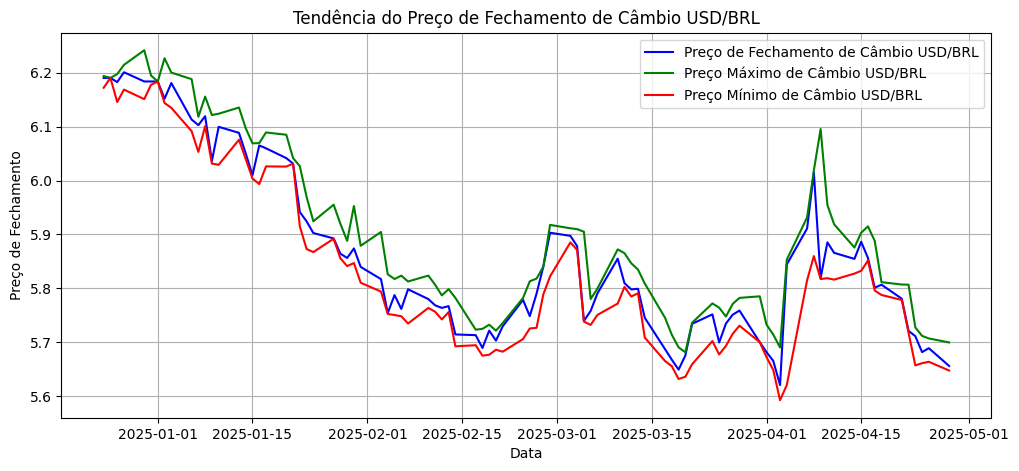

In [43]:
plt.figure(figsize=(12, 5))
plt.plot(fx_btc_df.index, fx_btc_df['fx_close'], label='Preço de Fechamento de Câmbio USD/BRL', color='blue')
plt.plot(fx_btc_df.index, fx_btc_df['fx_high'], label='Preço Máximo de Câmbio USD/BRL', color='green')
plt.plot(fx_btc_df.index, fx_btc_df['fx_low'], label='Preço Mínimo de Câmbio USD/BRL', color='red')

plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Tendência do Preço de Fechamento de Câmbio USD/BRL')
plt.legend()
plt.grid()
plt.show()

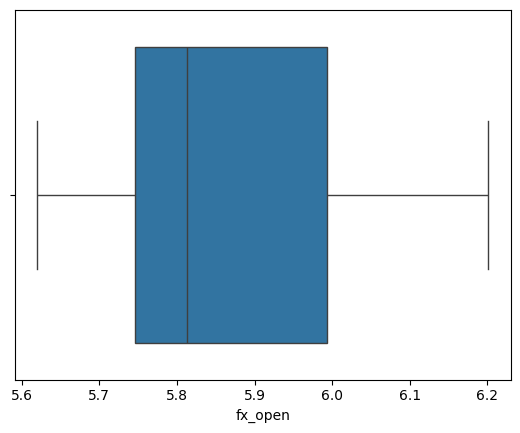

In [44]:
sns.boxplot(x=fx_btc_df['fx_open']);

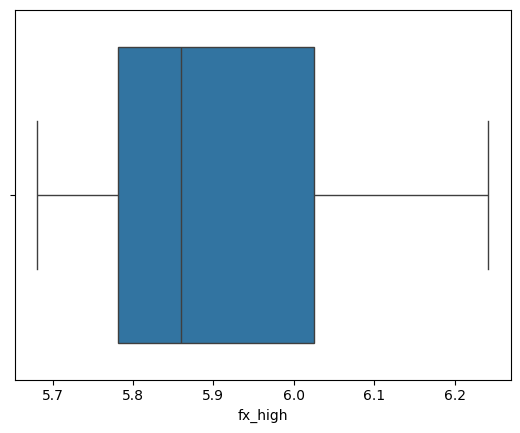

In [45]:
sns.boxplot(x=fx_btc_df['fx_high']);

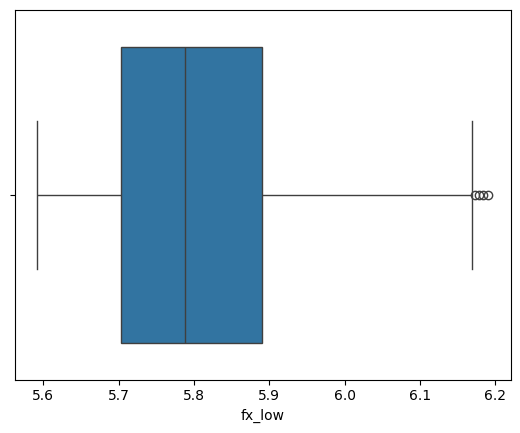

In [46]:
sns.boxplot(x=fx_btc_df['fx_low']);

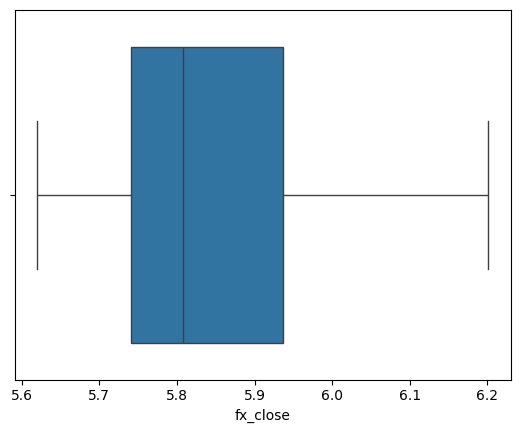

In [47]:
sns.boxplot(x=fx_btc_df['fx_close']);

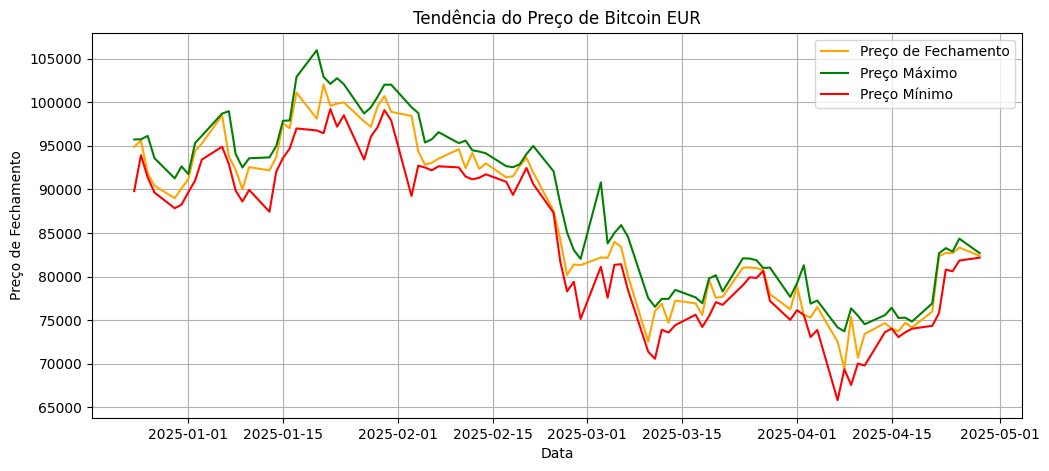

In [48]:
plt.figure(figsize=(12, 5))
plt.plot(fx_btc_df.index, fx_btc_df['btc_close'], label='Preço de Fechamento', color='orange')
plt.plot(fx_btc_df.index, fx_btc_df['btc_high'], label='Preço Máximo', color='green')
plt.plot(fx_btc_df.index, fx_btc_df['btc_low'], label='Preço Mínimo', color='red')

plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Tendência do Preço de Bitcoin EUR')
plt.legend()
plt.grid()
plt.show()

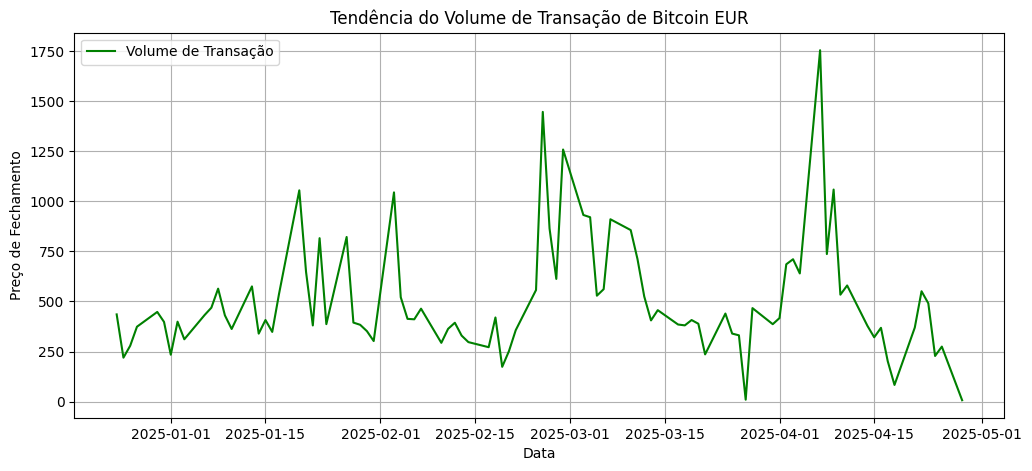

In [49]:
plt.figure(figsize=(12, 5))
plt.plot(fx_btc_df.index, fx_btc_df['btc_volume'], label='Volume de Transação', color='green')

plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Tendência do Volume de Transação de Bitcoin EUR')
plt.legend()
plt.grid()
plt.show()

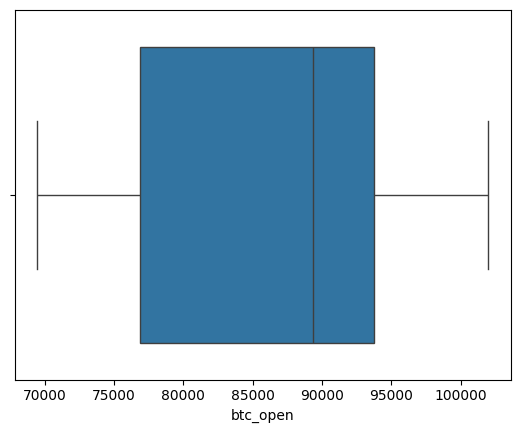

In [50]:
sns.boxplot(x=fx_btc_df['btc_open']);

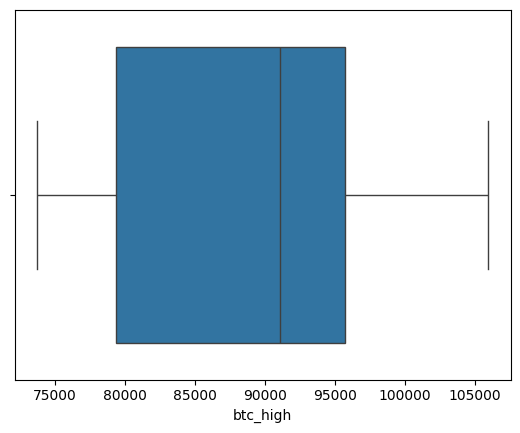

In [51]:
sns.boxplot(x=fx_btc_df['btc_high']);

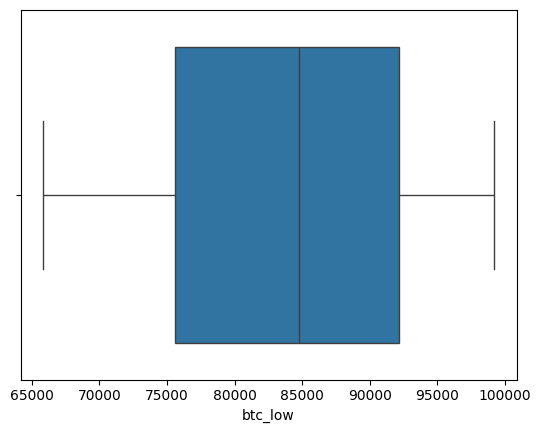

In [53]:
sns.boxplot(x=fx_btc_df['btc_low']);

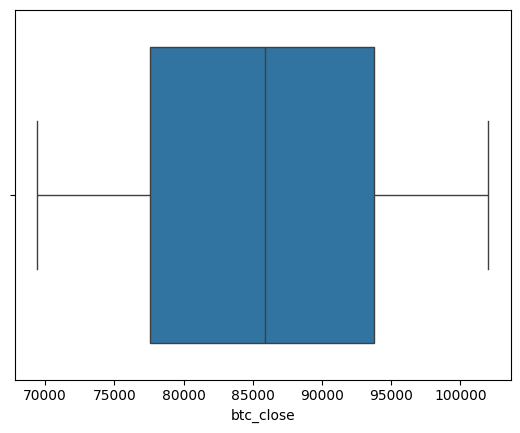

In [54]:
sns.boxplot(x=fx_btc_df['btc_close']);

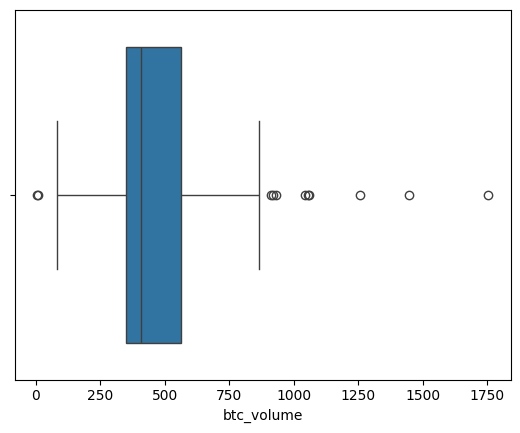

In [55]:
sns.boxplot(x=fx_btc_df['btc_volume']);